This notebook is part of the $\omega radlib$ documentation: http://wradlib.org/wradlib-docs.

Copyright (c) 2016, $\omega radlib$ developers.
Distributed under the MIT License. See LICENSE.txt for more info.

# Plotting with discrete colorbar

In this example we create a discrete colorbar.

In [4]:
import wradlib as wrl
import matplotlib.pyplot as pl
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')
try:
    get_ipython().magic("matplotlib inline")
except:
    pl.ion()
import numpy as np
import os
import glob

## Additional imports

In [5]:
import matplotlib.colors as col
import matplotlib.ticker as ticker

## Read radar data

In [7]:
filename = '2014-06-09--185000.rhi.mvol'
data, meta = wrl.io.read_GAMIC_hdf5(filename)
print(data['SCAN0'].keys())
print(meta['SCAN0'].keys())

dict_keys(['KDP', 'PHIDP', 'ZH', 'ZV', 'RHOHV', 'UH', 'UV', 'VH', 'VV', 'WH', 'WV', 'ZDR'])
dict_keys(['bin_count', 'range_start', 'scan_speed', 'range', 'range_step', 'range_samples', 'PRF', 'time_samples', 'angle_step', 'unfolding', 'pulse_width', 'filter', 'angle_sync', 'radar_wave_length', 'output64', 'half_resolution', 'ray_count', 'ele_start', 'ele_stop', 'azimuth', 'bin_range', 'zero_index', 'az', 'el', 'r', 'Time', 'max_range'])


## Extract Data from dictionary

In [8]:
zh = data['SCAN0']['ZH']['data']
az = meta['SCAN0']['az']
el = meta['SCAN0']['el']
r = meta['SCAN0']['r']
t = meta['SCAN0']['Time']

## Create ColorMap

In [9]:
def get_wradlib_cmap():
    startcolor = 'white'  
    color1 = '#8ec7ff'
    color2 = 'dodgerblue'
    color3 = 'lime'
    color4 = 'yellow'
    color5 = 'darkorange'
    color6 = 'red'
    endcolor = 'darkmagenta'    
    colors = [startcolor, color1, color2, color3, color4, color5, color6, endcolor]
    return col.LinearSegmentedColormap.from_list('wrl1',colors)


## Setup Colormap and Colorbar

In [13]:
cmin = -30
cmax = 60
cdiv = 5
ticks= [i for i in range(cmin,cmax+cdiv,cdiv)]
bounds=np.concatenate((np.array([cmin-cdiv]), ticks, np.array([cmax+cdiv])), axis=0)
cmap = get_wradlib_cmap()
norm = col.BoundaryNorm(bounds, cmap.N)

print("Ticks:", ticks)
print("Bounds:", bounds)

Ticks: [-30, -25, -20, -15, -10, -5, 0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]
Bounds: [-35 -30 -25 -20 -15 -10  -5   0   5  10  15  20  25  30  35  40  45  50
  55  60  65]


## Create Plot

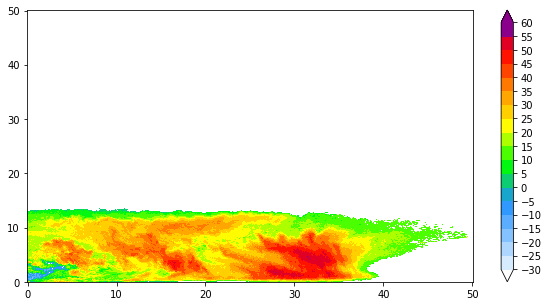

In [14]:
fig, ax = pl.subplots(figsize=(10,5))
ax, pm = wrl.vis.plot_rhi(zh, r=r / 1000., th=el, 
                          norm=norm, cmap=cmap,
                          vmin=zh.min(), vmax=zh.max(), 
                          ax=ax)
cbar2 = pl.colorbar(pm, extend='both', norm=norm, boundaries=bounds)
cbar2.locator = ticker.FixedLocator(bounds)
cbar2.update_ticks()

## Finalize Plot

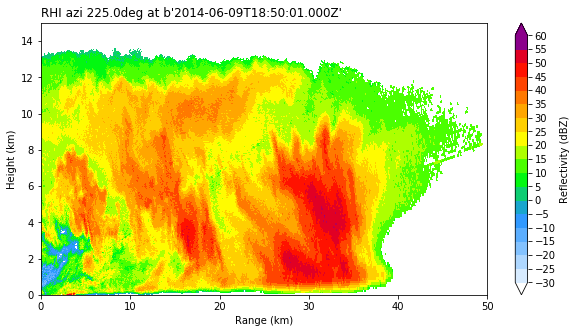

In [15]:
ztitle = 'Reflectivity'
zunit = 'dBZ'
title = 'RHI azi {0}deg at {1}'.format(az, t)
cbar2.set_label('{0} ({1})'.format(ztitle, zunit))
ax.set_xlabel('Range (km)')
ax.set_ylabel('Height (km)')
ax.set_xlim(0,50)
ax.set_ylim(0,15)
ax.set_title(title, loc='left')
fig